Brazilian Olist dataset

In [154]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [155]:
orders= pd.read_csv(r"C:\Users\U S E R\Downloads\olist_orders_dataset.csv")
product = pd.read_csv(r"C:\Users\U S E R\Downloads\olist_products_dataset.csv")
sellers = pd.read_csv(r"C:\Users\U S E R\Downloads\olist_sellers_dataset.csv")
productcategory = pd.read_csv(r"C:\Users\U S E R\Downloads\product_category_name_translation.csv")
ordersreview = pd.read_csv(r"C:\Users\U S E R\Downloads\olist_order_reviews_dataset.csv")
geolocation  = pd.read_csv(r"C:\Users\U S E R\Downloads\olist_geolocation_dataset.csv")
ordersitem = pd.read_csv(r"C:\Users\U S E R\Downloads\olist_order_items_dataset.csv")
orderspayment = pd.read_csv(r"C:\Users\U S E R\Downloads\olist_order_payments_dataset.csv")
customers = pd.read_csv(r"C:\Users\U S E R\Downloads\olist_customers_dataset.csv")



In [156]:
geolocation.head()
geolocation = geolocation.rename(columns ={"geolocation_zip_code_prefix": "seller_zip_code_prefix"})
geolocation.head()

,seller_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [157]:
# 1. Buyurtmalar va buyurtma sharhlarini birlashtirish
orders_with_reviews = pd.merge(orders, ordersreview, on='order_id', how='left')

# 2. Buyurtmalar, mahsulotlar va to'lovlarni birlashtirish (ordersitem orqali)
orders_and_items = pd.merge(orders_with_reviews, ordersitem, on='order_id', how='left')
orders_and_payments = pd.merge(orders_and_items, orderspayment, on='order_id', how='left')



In [158]:
# 3. Mahsulot va mahsulot kategoriyasini birlashtirish
products_with_category = pd.merge(product, productcategory, on='product_category_name', how='left')


In [159]:
# 4. Sotuvchilar va joylashuvni birlashtirish
sellers_with_geo = pd.merge(sellers, geolocation, on='seller_zip_code_prefix', how='left') # Kalitni to'g'rilash kerak


In [160]:
# 5. Barcha jadvallarni yakuniy jadvalga birlashtirish
# Avval, mahsulot ma'lumotlarini buyurtmalarga qo'shamiz
final_df = pd.merge(orders_and_payments, products_with_category, on='product_id', how='left')


In [161]:
# Endi, mijoz ma'lumotlarini qo'shamiz
final_df = pd.merge(final_df, customers, on='customer_id', how='left')
#Ram xotiram kichkinalik qildi
final_df.info(memory_usage='deep')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119143 non-null  object 
 1   customer_id                    119143 non-null  object 
 2   order_status                   119143 non-null  object 
 3   order_purchase_timestamp       119143 non-null  object 
 4   order_approved_at              118966 non-null  object 
 5   order_delivered_carrier_date   117057 non-null  object 
 6   order_delivered_customer_date  115722 non-null  object 
 7   order_estimated_delivery_date  119143 non-null  object 
 8   review_id                      118146 non-null  object 
 9   review_score                   118146 non-null  float64
 10  review_comment_title           13989 non-null   object 
 11  review_comment_message         50245 non-null   object 
 12  review_creation_date          

In [162]:
final_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4.0,...,4.0,500.0,19.0,8.0,13.0,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4.0,...,4.0,500.0,19.0,8.0,13.0,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4.0,...,4.0,500.0,19.0,8.0,13.0,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4.0,...,1.0,400.0,19.0,13.0,19.0,perfumery,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,e73b67b67587f7644d5bd1a52deb1b01,5.0,...,1.0,420.0,24.0,19.0,21.0,auto,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO


In [163]:
final_df.dtypes

order_id                          object
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
review_id                         object
review_score                     float64
review_comment_title              object
review_comment_message            object
review_creation_date              object
review_answer_timestamp           object
order_item_id                    float64
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
payment_sequential               float64
payment_type                      object
payment_installments             float64
payment_value                    float64
product_category

In [164]:
final_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4.0,...,4.0,500.0,19.0,8.0,13.0,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4.0,...,4.0,500.0,19.0,8.0,13.0,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4.0,...,4.0,500.0,19.0,8.0,13.0,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4.0,...,1.0,400.0,19.0,13.0,19.0,perfumery,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,e73b67b67587f7644d5bd1a52deb1b01,5.0,...,1.0,420.0,24.0,19.0,21.0,auto,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO


In [165]:
#Category column
category_col = ['order_status', 'product_category_name_english', 'customer_city', 'payment_type', 'product_category_name','customer_state']
for col1 in category_col:
    final_df[col1]= final_df[col1].astype('category')
#datetime column
datetime_col = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date','order_estimated_delivery_date', 'review_creation_date', 'review_answer_timestamp', 'shipping_limit_date' ]
for col2 in datetime_col:
    final_df[col2]=pd.to_datetime(final_df[col2])


In [166]:
final_df.dtypes

order_id                                 object
customer_id                              object
order_status                           category
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
review_id                                object
review_score                            float64
review_comment_title                     object
review_comment_message                   object
review_creation_date             datetime64[ns]
review_answer_timestamp          datetime64[ns]
order_item_id                           float64
product_id                               object
seller_id                                object
shipping_limit_date              datetime64[ns]
price                                   float64
freight_value                           float64
payment_sequential                      

In [167]:
final_df['review_score'] = final_df['review_score'].astype('Int8') # Integer supporting null values
final_df['price'] = final_df['price'].astype('float32')
final_df['freight_value'] = final_df['freight_value'].astype('float32')


# Converting `order_item_id` to the correct integer type
final_df['order_item_id'] = pd.to_numeric(final_df['order_item_id'], downcast='integer')

In [225]:
final_df.duplicated().sum()

np.int64(0)

In [168]:
#Va nihoyat, sotuvchi ma'lumotlarini qo'shamiz
#final_df = pd.merge(final_df, sellers_with_geo, on='seller_id', how='left')
final_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       119143 non-null  object        
 1   customer_id                    119143 non-null  object        
 2   order_status                   119143 non-null  category      
 3   order_purchase_timestamp       119143 non-null  datetime64[ns]
 4   order_approved_at              118966 non-null  datetime64[ns]
 5   order_delivered_carrier_date   117057 non-null  datetime64[ns]
 6   order_delivered_customer_date  115722 non-null  datetime64[ns]
 7   order_estimated_delivery_date  119143 non-null  datetime64[ns]
 8   review_id                      118146 non-null  object        
 9   review_score                   118146 non-null  Int8          
 10  review_comment_title           13989 non-null   object        
 11  

In [169]:
final_df.isnull().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                   177
order_delivered_carrier_date       2086
order_delivered_customer_date      3421
order_estimated_delivery_date         0
review_id                           997
review_score                        997
review_comment_title             105154
review_comment_message            68898
review_creation_date                997
review_answer_timestamp             997
order_item_id                       833
product_id                          833
seller_id                           833
shipping_limit_date                 833
price                               833
freight_value                       833
payment_sequential                    3
payment_type                          3
payment_installments                  3
payment_value                         3
product_category_name              2542


In [173]:
df_clean = final_df.drop(['review_comment_title', 'review_comment_message'], axis=1)

In [208]:
#dropna columns
df_clean.dropna(subset=['payment_sequential', 'payment_type', 'payment_installments', 'payment_value'], inplace=True)
# fillna 
# df_clean['price'] ustunidagi null qiymatlarni oʻrtacha qiymat bilan toʻldirib, natijani ustunga tayinlash
df_clean['price'] = df_clean['price'].fillna(df_clean['price'].mean())
df_clean['freight_value'] = df_clean['freight_value'].fillna(df_clean['freight_value'].mean())
# ffil\ bfill columns
df_clean['order_approved_at'].fillna({'order_approved_at': df_clean['order_approved_at'].ffill}, inplace=True)
fill_values= {
    'order_delivered_carrier_date': df_clean['order_delivered_carrier_date'].ffill(),
    'order_delivered_customer_date': df_clean['order_delivered_customer_date'].bfill(),
    'review_creation_date': df_clean['review_creation_date'].bfill(),
    'shipping_limit_date ': df_clean['shipping_limit_date'].ffill(),
    'product_category_name_english': df_clean['product_category_name_english'].mode()[0]
    
}
df_clean.fillna(fill_values, inplace=True)



In [209]:
# 2. Keyin null qiymatlarni to'ldiramiz va ustunga qayta tayinlaymiz
df_clean['product_category_name'] = df_clean['product_category_name'].fillna('unknown')

In [210]:
df_clean.info(memory_usage='deep')
df_clean.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 119140 entries, 0 to 119142
Data columns (total 35 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       119140 non-null  object        
 1   customer_id                    119140 non-null  object        
 2   order_status                   119140 non-null  category      
 3   order_purchase_timestamp       119140 non-null  datetime64[ns]
 4   order_approved_at              119140 non-null  datetime64[ns]
 5   order_delivered_carrier_date   119140 non-null  datetime64[ns]
 6   order_delivered_customer_date  119140 non-null  datetime64[ns]
 7   order_estimated_delivery_date  119140 non-null  datetime64[ns]
 8   review_id                      118143 non-null  object        
 9   review_score                   118143 non-null  Int8          
 10  review_creation_date           119140 non-null  datetime64[ns]
 11  revie

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date       0
order_estimated_delivery_date       0
review_id                         997
review_score                      997
review_creation_date                0
review_answer_timestamp           997
order_item_id                     833
product_id                        833
seller_id                         833
shipping_limit_date               833
price                               0
freight_value                       0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
product_category_name               0
product_name_lenght              2542
product_description_lenght       2542
product_photos_qty               2542
product_weig

# **EDA**
## *Analize data*


# **Savdo tendentsiyalari (Time-series analysis).**

In [250]:
#Va nihoyat, sotuvchi ma'lumotlarini qo'shamiz
sellers_with_geo.head()


,seller_id,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.898536,-47.063125,campinas,SP
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.895499,-47.061944,campinas,SP
2,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.891740,-47.060820,campinas,SP
3,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.895762,-47.066144,campinas,SP
4,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.896154,-47.062431,campinas,SP


In [286]:
sellers_with_geo.dtypes
sellers_with_geo.isnull().sum()
sellers_with_geo.info(memory_usage='deep')
df = sellers_with_geo
# Missinglarni to'ldirish (masalan, o'rtacha bilan)
fill_val = {
    'geolocation_lat': df['geolocation_lat'].median(),
    'geolocation_lng': df['geolocation_lng'].median()
}
df.fillna(fill_val, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435094 entries, 0 to 435093
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   seller_id               435094 non-null  object 
 1   seller_zip_code_prefix  435094 non-null  int64  
 2   seller_city             435094 non-null  object 
 3   seller_state            435094 non-null  object 
 4   geolocation_lat         435094 non-null  float64
 5   geolocation_lng         435094 non-null  float64
 6   geolocation_city        435094 non-null  object 
 7   geolocation_state       435094 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 136.2 MB


In [287]:
df.duplicated().sum()
df.drop_duplicates()
df=df.drop('seller_zip_code_prefix', axis=1)
df=df.drop('seller_city', axis=1)
df=df.drop('seller_state', axis=1)
df.head()


,seller_id,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,3442f8959a84dea7ee197c632cb2df15,-22.898536,-47.063125,campinas,SP
1,3442f8959a84dea7ee197c632cb2df15,-22.895499,-47.061944,campinas,SP
2,3442f8959a84dea7ee197c632cb2df15,-22.891740,-47.060820,campinas,SP
3,3442f8959a84dea7ee197c632cb2df15,-22.895762,-47.066144,campinas,SP
4,3442f8959a84dea7ee197c632cb2df15,-22.896154,-47.062431,campinas,SP


In [288]:
#Va nihoyat, sotuvchi ma'lumotlarini qo'shamiz
#final_df = pd.merge(final_df, df, on='seller_id', how='left')
df.info(memory_usage='deep')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435094 entries, 0 to 435093
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   seller_id          435094 non-null  object 
 1   geolocation_lat    435094 non-null  float64
 2   geolocation_lng    435094 non-null  float64
 3   geolocation_city   435094 non-null  object 
 4   geolocation_state  435094 non-null  object 
dtypes: float64(2), object(3)
memory usage: 87.0 MB


In [289]:
df['geolocation_city'] = df['geolocation_city'].astype('category')
df['geolocation_state'] = df['geolocation_state'].astype('category')


In [299]:
df['seller_id'] = df['seller_id'].astype('category')
final_df['seller_id'] = final_df['seller_id'].astype('category')


In [301]:
#Va nihoyat, sotuvchi ma'lumotlarini qo'shamiz
final_df = pd.merge(final_df, sellers_with_geo, on='seller_id', how='inner')
final_df.info(memory_usage='deep')

MemoryError: Unable to allocate 1.02 GiB for an array with shape (8, 17093508) and data type datetime64[ns]

In [303]:
# Seller_id duplikatlarni tekshirish
print("Unique seller_id in seller_geo:", df['seller_id'].nunique())  # Ehtimol ~3K
print("Unique seller_id in final_df:", final_df['seller_id'].nunique())
# Seller_geo da duplikatlarni olib tashlash
df = df.drop_duplicates(subset=['seller_id'])
print("Seller_geo after deduplication:", df.shape)  # ~3K qator bo'lishi kerak

Unique seller_id in seller_geo: 3095
Unique seller_id in final_df: 3095
Seller_geo after deduplication: (3095, 5)


In [305]:
import pandas as pd
import sqlite3

# SQLite bazasini yaratish
conn = sqlite3.connect('olist.db')

# Jadvalarni import
final_df.to_sql('final', conn, if_exists='replace', index=False)
df.to_sql('seller_geo', conn, if_exists='replace', index=False)

# Seller_geo da duplikatlarni oldindan olib tashlash
conn.execute("CREATE TABLE seller_geo_unique AS SELECT DISTINCT seller_id, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state FROM seller_geo")
conn.execute("DROP TABLE seller_geo")  # Eski jadvalni tashlash
conn.execute("ALTER TABLE seller_geo_unique RENAME TO seller_geo")

# Merge query
query = """
SELECT f.*, sg.geolocation_lat, sg.geolocation_lng, sg.geolocation_city, sg.geolocation_state
FROM final f
LEFT JOIN seller_geo sg ON f.seller_id = sg.seller_id
"""
merged_df = pd.read_sql_query(query, conn)
conn.close()

# Saqlash
merged_df.to_csv('merged_final.csv', index=False)
print(merged_df.shape)

(119143, 41)


In [306]:
# Jadvalni yuklash
merged_df = pd.read_csv('merged_final.csv')  # Sizning merged faylingiz

# NaN larni tekshirish
print(merged_df.isnull().sum())  # Har ustundagi NaN lar soni
print(merged_df[['geolocation_lat', 'geolocation_lng', 'geolocation_city', 'geolocation_state']].isnull().sum())

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                   177
order_delivered_carrier_date       2086
order_delivered_customer_date      3421
order_estimated_delivery_date         0
review_id                           997
review_score                        997
review_comment_title             105154
review_comment_message            68898
review_creation_date                997
review_answer_timestamp             997
order_item_id                       833
product_id                          833
seller_id                           833
shipping_limit_date                 833
price                               833
freight_value                       833
payment_sequential                    3
payment_type                          3
payment_installments                  3
payment_value                         3
product_category_name              2542


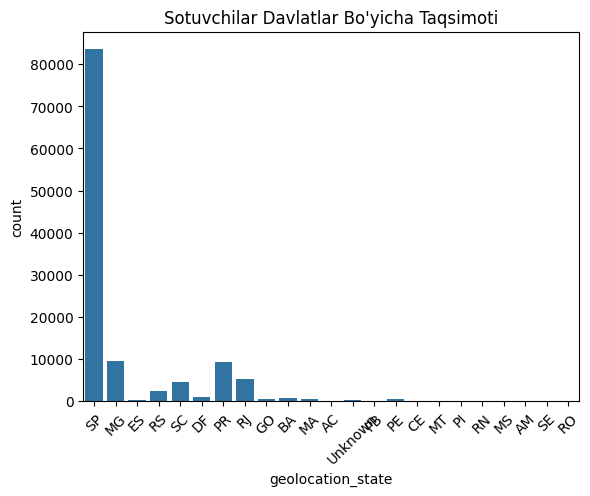

In [307]:
sns.countplot(data=merged_df, x='geolocation_state')
plt.title('Sotuvchilar Davlatlar Bo\'yicha Taqsimoti')
plt.xticks(rotation=45)
plt.show()  # SP, RJ, MG ko'p bo'lishi mumkin